<a href="https://colab.research.google.com/github/Femil0/metnum_pertemuan10_Listyawan_Femil_Anaki/blob/main/metnum_pertemuan10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

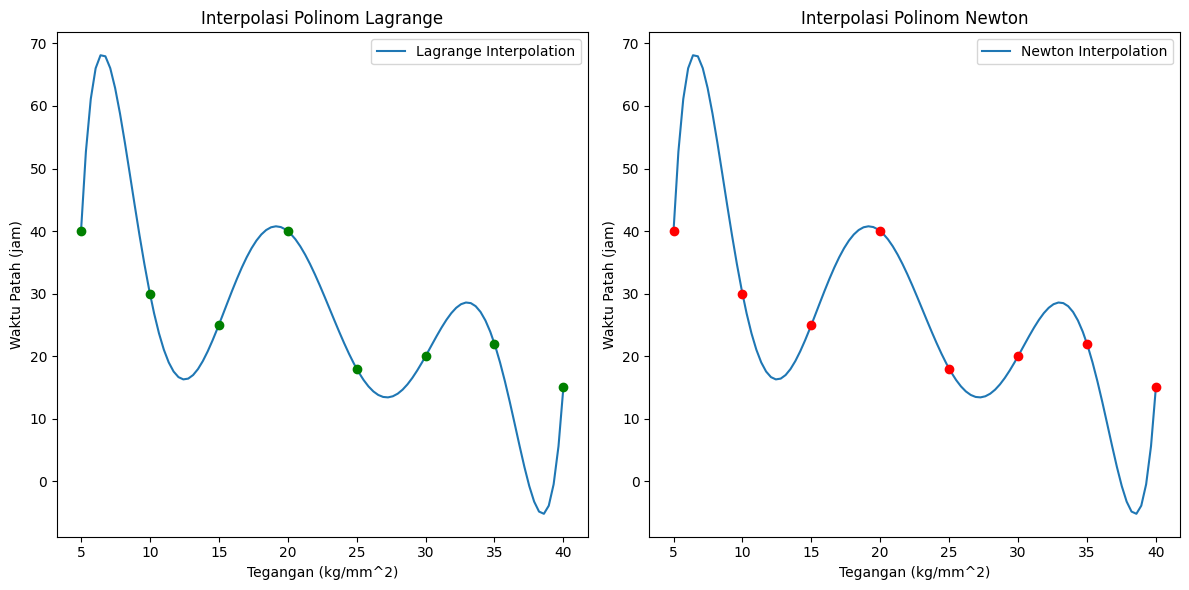

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data points
data_points = {
    5: 40,
    10: 30,
    15: 25,
    20: 40,
    25: 18,
    30: 20,
    35: 22,
    40: 15
}

# Implementasi Polinom Lagrange
def lagrange_interpolation(x, data_points):
    result = 0
    for xi in data_points:
        term = data_points[xi]
        for xj in data_points:
            if xi != xj:
                term *= (x - xj) / (xi - xj)
        result += term
    return result

# Implementasi Polinom Newton
def newton_interpolation(x, data_points):
    n = len(data_points)
    x_points = list(data_points.keys())
    y_points = list(data_points.values())

    divided_diff = np.zeros((n, n))
    divided_diff[:, 0] = y_points

    for j in range(1, n):
        for i in range(n - j):
            divided_diff[i][j] = (divided_diff[i + 1][j - 1] - divided_diff[i][j - 1]) / (x_points[i + j] - x_points[i])

    result = divided_diff[0, 0]
    product_term = 1
    for i in range(1, n):
        product_term *= (x - x_points[i - 1])
        result += divided_diff[0, i] * product_term

    return result

# Testing Kode Sumber dan Plot Grafik
x_values = np.linspace(5, 40, 100)
y_lagrange = [lagrange_interpolation(x, data_points) for x in x_values]
y_newton = [newton_interpolation(x, data_points) for x in x_values]

# Plotting results for Lagrange
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_values, y_lagrange, label='Lagrange Interpolation')
plt.scatter(data_points.keys(), data_points.values(), color='green', zorder=5)
plt.legend()
plt.xlabel('Tegangan (kg/mm^2)')
plt.ylabel('Waktu Patah (jam)')
plt.title('Interpolasi Polinom Lagrange')

# Plotting results for Newton
plt.subplot(1, 2, 2)
plt.plot(x_values, y_newton, label='Newton Interpolation')
plt.scatter(data_points.keys(), data_points.values(), color='red', zorder=5)
plt.legend()
plt.xlabel('Tegangan (kg/mm^2)')
plt.ylabel('Waktu Patah (jam)')
plt.title('Interpolasi Polinom Newton')

plt.tight_layout()
plt.show()
